In [1]:
import requests


def extract_financialstatement(api, statement, ticker):
    # Set up the API request
    api_key = str(api)
    if statement == "Income":
        url = f"https://financialmodelingprep.com/api/v3/financials/income-statement/{ticker}?apikey={api_key}"
        # Send the API request and retrieve the data
        response = requests.get(url)
        data = response.json()
        # Extract the financial statements
        income_statement = data["financials"]
        return income_statement
    
    elif statement == "Balance":
        url = f"https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/{ticker}?apikey={api_key}"
        # Send the API request and retrieve the data
        response = requests.get(url)
        data = response.json()
        # Extract the financial statements
        balance_sheet = data["financials"]
        return balance_sheet
        
    elif statement == "Cash":
    
        url = f"https://financialmodelingprep.com/api/v3/financials/cash-flow-statement/{ticker}?apikey={api_key}"
        # Send the API request and retrieve the data
        response = requests.get(url)
        data = response.json()
        # Extract the financial statements
        cash_flow = data["financials"]
        return cash_flow
        
    

In [2]:
incomestatement = extract_financialstatement("", "Income", "TUP")
balancesheet = extract_financialstatement("", "Balance", "TUP")
cashflow = extract_financialstatement("", "Cash", "TUP")

In [3]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)

incomestatement = pd.DataFrame(incomestatement)
balancesheet = pd.DataFrame(balancesheet)
cashflow = pd.DataFrame(cashflow)

In [4]:
'''''
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(15, 15))

ax[0].set_title("Revenue")
ax[1].set_title("Profit Margins")

sns.lineplot(x="date", y='Revenue', data=incomestatement, color="blue", label="Revenue", ax=ax[0])
sns.lineplot(x="date", y='Gross Margin', data=incomestatement, color="orange", ax=ax[1], label="Gross Margin")
sns.lineplot(x="date", y='Earnings Before Tax Margin', data=incomestatement, color="gold", ax=ax[1], label="EBT Margin")
sns.lineplot(x="date", y='Net Profit Margin', data=incomestatement, color="blue", ax=ax[1], label="Net Profit Margin")

# Turns off grid on the left Axis.
ax[0].grid(False)
ax[1].grid(False)
# Remove all borders
sns.despine(bottom = True, left = True)




# Show the plot
plt.show()

'''''

'\'\'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Create the plot\nsns.set_style("whitegrid")\nfig, ax = plt.subplots(2, 1, figsize=(15, 15))\n\nax[0].set_title("Revenue")\nax[1].set_title("Profit Margins")\n\nsns.lineplot(x="date", y=\'Revenue\', data=incomestatement, color="blue", label="Revenue", ax=ax[0])\nsns.lineplot(x="date", y=\'Gross Margin\', data=incomestatement, color="orange", ax=ax[1], label="Gross Margin")\nsns.lineplot(x="date", y=\'Earnings Before Tax Margin\', data=incomestatement, color="gold", ax=ax[1], label="EBT Margin")\nsns.lineplot(x="date", y=\'Net Profit Margin\', data=incomestatement, color="blue", ax=ax[1], label="Net Profit Margin")\n\n# Turns off grid on the left Axis.\nax[0].grid(False)\nax[1].grid(False)\n# Remove all borders\nsns.despine(bottom = True, left = True)\n\n\n\n\n# Show the plot\nplt.show()\n\n'

In [5]:
'''''
def vertical_analysis(income_statements, balance_sheet):

    income_statementzz = income_statements.copy()
    balance_sheetzz = balance_sheet.copy()
    
    for x in income_statementzz.columns:
        if income_statementzz[str(x)].dtype.kind == 'f':
            income_statementzz[str(x) + " %"] = (income_statementzz[str(x)]/ income_statementzz["Revenue"]) * 100

    for y in balance_sheetzz.columns:
        if balance_sheetzz[str(y)].dtype.kind == 'f':
            balance_sheetzz[str(y) + " %"] = (balance_sheetzz[str(y)]/ balance_sheetzz["Total assets"]) * 100
            
    return income_statementzz, balance_sheetzz
'''''

'\'\'\ndef vertical_analysis(income_statements, balance_sheet):\n\n    income_statementzz = income_statements.copy()\n    balance_sheetzz = balance_sheet.copy()\n    \n    for x in income_statementzz.columns:\n        if income_statementzz[str(x)].dtype.kind == \'f\':\n            income_statementzz[str(x) + " %"] = (income_statementzz[str(x)]/ income_statementzz["Revenue"]) * 100\n\n    for y in balance_sheetzz.columns:\n        if balance_sheetzz[str(y)].dtype.kind == \'f\':\n            balance_sheetzz[str(y) + " %"] = (balance_sheetzz[str(y)]/ balance_sheetzz["Total assets"]) * 100\n            \n    return income_statementzz, balance_sheetzz\n'

In [6]:
def transform_financials(fs1):
    fs = fs1.copy()
    fs = fs.set_index("date")
    fs = fs.apply(pd.to_numeric)
    fs = fs.T
    return fs


In [7]:
income_statement = transform_financials(incomestatement)
balance_sheet = transform_financials(balancesheet)
cash_flow = transform_financials(cashflow)

balance_sheet = balance_sheet.drop("2021-06-13", axis=1) 
balance_sheet

date,2021-12-25,2020-12-26,2019-12-28,2018-12-29,2017-12-30,2016-12-31,2015-12-26,2014-12-27,2013-12-28,2012-12-29,2011-12-31,2010-12-25,2009-12-26,2008-12-27,2007-12-29,2006-12-30,2005-12-31,2004-12-25,2003-12-27,2002-12-28,2001-12-29,2000-12-30,1999-12-25,1998-12-26,1997-12-27,1996-12-28
Cash and cash equivalents,267200000.00,139100000.00,123200000.00,149000000.00,144100000.00,93200000.00,79800000.00,77000000.00,127300000.00,119800000.00,138200000.00,248700000.00,112400000.00,124800000.00,102700000.00,102200000.00,181500000.00,90900000.00,45000000.00,32600000.00,18400000.00,32600000.00,24400000.00,23000000.00,22100000.00,53000000.00
Short-term investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35000000.00,20300000.00,13100000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Cash and short-term investments,267200000.00,139100000.00,123200000.00,149000000.00,144100000.00,93200000.00,79800000.00,112000000.00,147600000.00,132900000.00,138200000.00,248700000.00,112400000.00,124800000.00,102700000.00,102200000.00,181500000.00,90900000.00,45000000.00,32600000.00,18400000.00,32600000.00,24400000.00,23000000.00,22100000.00,53000000.00
Receivables,118100000.00,140600000.00,133800000.00,167900000.00,170800000.00,190200000.00,166700000.00,194900000.00,198600000.00,199300000.00,211200000.00,221300000.00,222000000.00,215800000.00,196600000.00,167800000.00,164800000.00,139800000.00,130700000.00,103200000.00,133300000.00,112500000.00,114400000.00,92300000.00,97000000.00,154800000.00
Inventories,232200000.00,236300000.00,245200000.00,257700000.00,262200000.00,240400000.00,254600000.00,306000000.00,313400000.00,313900000.00,302500000.00,279100000.00,265500000.00,277300000.00,269900000.00,232700000.00,235100000.00,163000000.00,160500000.00,148200000.00,132200000.00,144100000.00,136700000.00,157100000.00,184200000.00,252800000.00
Total current assets,648200000.00,546100000.00,538500000.00,620600000.00,630500000.00,545300000.00,550500000.00,634500000.00,779000000.00,766500000.00,769400000.00,849200000.00,696800000.00,703800000.00,699500000.00,586600000.00,672700000.00,466000000.00,411400000.00,360100000.00,366100000.00,372400000.00,370500000.00,385600000.00,403100000.00,523200000.00
"Property, Plant & Equipment Net",235600000.00,300400000.00,351600000.00,276000000.00,278200000.00,259800000.00,253600000.00,290300000.00,300900000.00,298800000.00,273100000.00,258000000.00,254600000.00,245400000.00,266000000.00,256600000.00,254500000.00,216000000.00,221400000.00,228900000.00,228500000.00,233100000.00,242900000.00,271000000.00,293000000.00,331000000.00
Goodwill and Intangible Assets,53300000.00,84000000.00,84100000.00,129000000.00,141400000.00,199900000.00,229000000.00,270400000.00,310400000.00,336300000.00,405700000.00,464500000.00,452700000.00,465200000.00,539500000.00,552300000.00,571200000.00,56200000.00,56200000.00,56200000.00,56200000.00,57700000.00,2900000.00,0.00,0.00,0.00
Long-term investments,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Tax assets,194900000.00,178500000.00,3300000.00,7300000.00,41000000.00,539700000.00,16900000.00,14300000.00,30300000.00,11900000.00,339200000.00,81900000.00,48900000.00,67500000.00,87800000.00,77000000.00,168400000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
def vertical_analysis(fs1, row_comparison):
    fs = fs1.copy()
    for x in fs.columns:
        fs[str(x) + " %"] = (fs[str(x)] / fs.loc[row_comparison, str(x)])
    
    fs = fs.reindex(sorted(fs.columns, reverse=True), axis=1)
    
    return fs
    

In [9]:
def horizontal_analysis(fs1):
    df = fs1.copy()

    for i in range(0, len(df.columns)):
        col_name = df.columns[i] + " % Change"
        previous_period = df.iloc[:, i + 1]
        current_period = df.iloc[:, i]
        pct_change = ((current_period - previous_period) / previous_period) * 100
        df[col_name] = pct_change
    
    df = df.reindex(sorted(df.columns, reverse=True), axis=1)
    return df
    

In [10]:
income_statementh = horizontal_analysis(income_statement)
balance_sheeth = horizontal_analysis(balance_sheet)

balance_sheeth

date,2021-12-25 % Change,2021-12-25,2020-12-26 % Change,2020-12-26,2019-12-28 % Change,2019-12-28,2018-12-29 % Change,2018-12-29,2017-12-30 % Change,2017-12-30,2016-12-31 % Change,2016-12-31,2015-12-26 % Change,2015-12-26,2014-12-27 % Change,2014-12-27,2013-12-28 % Change,2013-12-28,2012-12-29 % Change,2012-12-29,2011-12-31 % Change,2011-12-31,2010-12-25 % Change,2010-12-25,2009-12-26 % Change,2009-12-26,2008-12-27 % Change,2008-12-27,2007-12-29 % Change,2007-12-29,2006-12-30 % Change,2006-12-30,2005-12-31 % Change,2005-12-31,2004-12-25 % Change,2004-12-25,2003-12-27 % Change,2003-12-27,2002-12-28 % Change,2002-12-28,2001-12-29 % Change,2001-12-29,2000-12-30 % Change,2000-12-30,1999-12-25 % Change,1999-12-25,1998-12-26 % Change,1998-12-26,1997-12-27 % Change,1997-12-27,1996-12-28 % Change,1996-12-28
Cash and cash equivalents,92.09,267200000.00,12.91,139100000.00,-17.32,123200000.00,3.40,149000000.00,54.61,144100000.00,16.79,93200000.00,3.64,79800000.00,-39.51,77000000.00,6.26,127300000.00,-13.31,119800000.00,-44.43,138200000.00,121.26,248700000.00,-9.94,112400000.00,21.52,124800000.00,0.49,102700000.00,-43.69,102200000.00,99.67,181500000.00,102.00,90900000.00,38.04,45000000.00,77.17,32600000.00,-43.56,18400000.00,33.61,32600000.00,6.09,24400000.00,4.07,23000000.00,-58.30,22100000.00,57551031.93,53000000.00
Short-term investments,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,-100.00,0.00,72.41,35000000.00,54.96,20300000.00,inf,13100000.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
Cash and short-term investments,92.09,267200000.00,12.91,139100000.00,-17.32,123200000.00,3.40,149000000.00,54.61,144100000.00,16.79,93200000.00,-28.75,79800000.00,-24.12,112000000.00,11.06,147600000.00,-3.84,132900000.00,-44.43,138200000.00,121.26,248700000.00,-9.94,112400000.00,21.52,124800000.00,0.49,102700000.00,-43.69,102200000.00,99.67,181500000.00,102.00,90900000.00,38.04,45000000.00,77.17,32600000.00,-43.56,18400000.00,33.61,32600000.00,6.09,24400000.00,4.07,23000000.00,-58.30,22100000.00,57551031.93,53000000.00
Receivables,-16.00,118100000.00,5.08,140600000.00,-20.31,133800000.00,-1.70,167900000.00,-10.20,170800000.00,14.10,190200000.00,-14.47,166700000.00,-1.86,194900000.00,-0.35,198600000.00,-5.63,199300000.00,-4.56,211200000.00,-0.32,221300000.00,2.87,222000000.00,9.77,215800000.00,17.16,196600000.00,1.82,167800000.00,17.88,164800000.00,6.96,139800000.00,26.65,130700000.00,-22.58,103200000.00,18.49,133300000.00,-1.66,112500000.00,23.94,114400000.00,-4.85,92300000.00,-37.34,97000000.00,-967328100.00,154800000.00
Inventories,-1.74,232200000.00,-3.63,236300000.00,-4.85,245200000.00,-1.72,257700000.00,9.07,262200000.00,-5.58,240400000.00,-16.80,254600000.00,-2.36,306000000.00,-0.16,313400000.00,3.77,313900000.00,8.38,302500000.00,5.12,279100000.00,-4.26,265500000.00,2.74,277300000.00,15.99,269900000.00,-1.02,232700000.00,44.23,235100000.00,1.56,163000000.00,8.30,160500000.00,12.10,148200000.00,-8.26,132200000.00,5.41,144100000.00,-12.99,136700000.00,-14.71,157100000.00,-27.14,184200000.00,-14569912295.12,252800000.00
Total current assets,18.70,648200000.00,1.41,546100000.00,-13.23,538500000.00,-1.57,620600000.00,15.62,630500000.00,-0.94,545300000.00,-13.24,550500000.00,-18.55,634500000.00,1.63,779000000.00,-0.38,766500000.00,-9.40,769400000.00,21.87,849200000.00,-0.99,696800000.00,0.61,703800000.00,19.25,699500000.00,-12.80,586600000.00,44.36,672700000.00,13.27,466000000.00,14.25,411400000.00,-1.64,360100000.00,-1.69,366100000.00,0.51,372400000.00,-3.92,370500000.00,-4.34,385600000.00,-22.95,403100000.00,2798428107.64,523200000.00
"Property, Plant & Equipment Net",-21.57,235600000.00,-14.56,300400000.00,27.39,351600000.00,-0.79,276000000.00,7.08,278200000.00,2.44,259800000.00,-12.64,253600000.00,-3.52,290300000.00,0.70,300900000.00,9.41,298800000.00,5.85,273100000.00,1.34,258000000.00,3.75,254600000.00,-7.74,245400000.00,3.66,266000000.

In [11]:
income_statement

date,2021-12-25,2020-12-26,2019-12-28,2018-12-29,2017-12-30,2016-12-31,2015-12-26,2014-12-27,2013-12-28,2012-12-29,2011-12-31,2010-12-25,2009-12-26,2008-12-27,2007-12-29,2006-12-30,2005-12-31,2004-12-25,2003-12-27,2002-12-28,2001-12-29,2000-12-30,1999-12-25,1998-12-26,1997-12-27,1996-12-28
Revenue,1602300000.00,1740100000.00,1797900000.00,2069700000.00,2255800000.00,2213100000.00,2283800000.00,2606100000.00,2671600000.00,2583800000.00,2585000000.00,2300400000.00,2127500000.00,2161800000.00,1981400000.00,1743700000.00,1279300000.00,1224300000.00,1174800000.00,1103500000.00,1114400000.00,1073100000.00,1043800000.00,1082800000.00,1229300000.00,1369300000.00
Revenue Growth,NaN,NaN,-0.13,-0.08,0.02,-0.03,-0.12,-0.02,0.03,-0.00,0.12,0.08,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cost of Revenue,534000000.00,570800000.00,610800000.00,692200000.00,744600000.00,715000000.00,744400000.00,884000000.00,889800000.00,856200000.00,862500000.00,766200000.00,718500000.00,764100000.00,695400000.00,615000000.00,456200000.00,425400000.00,408000000.00,362600000.00,374000000.00,358400000.00,365100000.00,406300000.00,473900000.00,487300000.00
Gross Profit,1068300000.00,1169300000.00,1187100000.00,1377500000.00,1511200000.00,1498100000.00,1539400000.00,1722100000.00,1781800000.00,1727600000.00,1722500000.00,1534200000.00,1409000000.00,1397700000.00,1286000000.00,1128700000.00,823100000.00,798900000.00,766800000.00,740900000.00,740400000.00,714700000.00,678700000.00,676500000.00,755400000.00,882000000.00
R&D Expenses,0.00,0.00,15100000.00,15000000.00,16700000.00,0.00,18100000.00,19300000.00,20000000.00,18900000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SG&A Expense,0.00,0.00,983400000.00,1045500000.00,1145600000.00,1170800000.00,1199500000.00,1326800000.00,1349700000.00,1310600000.00,1340000000.00,1193100000.00,1119100000.00,1161000000.00,1083400000.00,981500000.00,715700000.00,688800000.00,677400000.00,625200000.00,610400000.00,578400000.00,536800000.00,562300000.00,620700000.00,627200000.00
Operating Expenses,827200000.00,949600000.00,1061200000.00,1057700000.00,1282100000.00,1170800000.00,1224200000.00,1354400000.00,1378300000.00,1421100000.00,1340000000.00,1204800000.00,1133300000.00,1154100000.00,1091900000.00,976600000.00,711700000.00,696900000.00,710200000.00,623500000.00,658200000.00,613600000.00,575400000.00,585000000.00,644600000.00,647500000.00
Operating Income,250500000.00,197600000.00,125900000.00,319800000.00,229100000.00,347000000.00,315200000.00,367700000.00,403500000.00,306500000.00,342300000.00,329400000.00,275700000.00,243600000.00,194100000.00,152100000.00,111400000.00,116200000.00,86300000.00,94900000.00,105200000.00,136300000.00,126800000.00,114200000.00,134700000.00,254800000.00
Interest Expense,35200000.00,38600000.00,41500000.00,46500000.00,46100000.00,48800000.00,47600000.00,46500000.00,40200000.00,34900000.00,49000000.00,29300000.00,31600000.00,41700000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Earnings before Tax,198200000.00,212300000.00,103400000.00,276200000.00,185100000.00,301300000.00,259900000.00,298200000.00,360400000.00,272800000.00,295300000.00,299700000.00,237100000.00,201900000.00,141400000.00,103800000.00,65700000.00,102000000.00,56600000.00,117400000.00,82200000.00,101100000.00,103300000.00,91500000.00,110800000.00,234500000.00


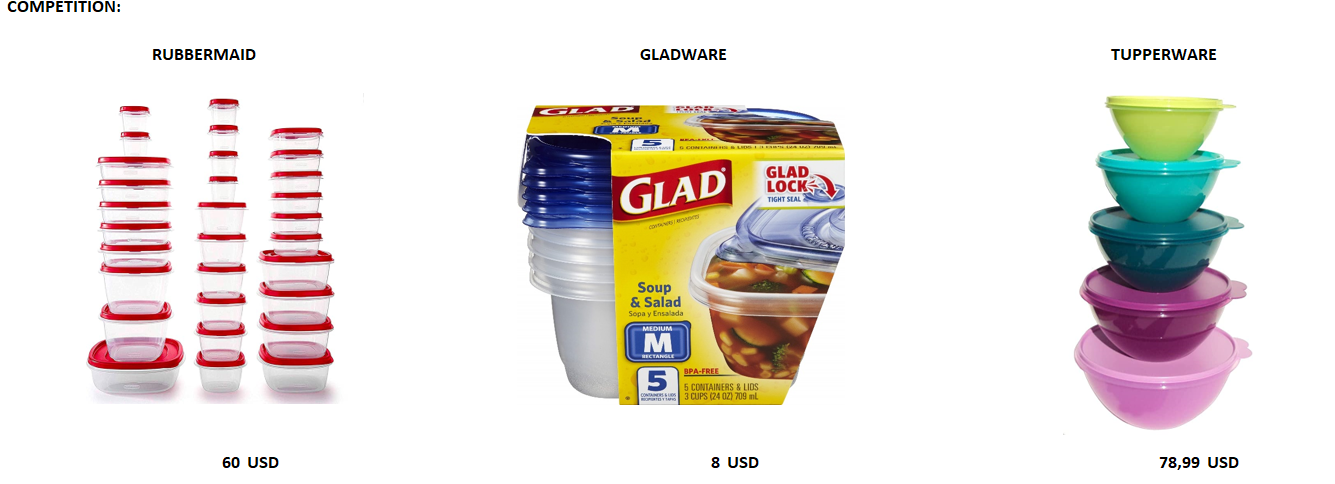

In [12]:
def financial_ratios(bs, ic, cf):
    ratios = pd.DataFrame()
    
    ratios["return_on_equity"] = ic.loc["Net Income"] / bs.loc["Total shareholders equity"]
    
    # profitability ratio
    
    ratios["net profit ratio"] = ic.loc["Net Income"] / ic.loc["Revenue"]
    ratios["capital structure impact"] = ic.loc["Earnings before Tax"] / ic.loc["Operating Income"]
    ratios["interest impact"] = ic.loc["Interest Expense"] / ic.loc["Revenue"]
    ratios["tax ratio"] = ic.loc["Net Income"] / ic.loc["Earnings before Tax"]
    ratios["tax pct"] = ic.loc["Income Tax Expense"] / ic.loc["Earnings before Tax"]
    ratios["operating profit ratio"] = ic.loc["Operating Income"] / ic.loc["Revenue"]
    ratios["gross profit ratio"] = ic.loc["Gross Profit"] / ic.loc["Revenue"]
    
    # efficiency ratio
    
    ratios["asset turnover"] = ic.loc["Revenue"] / bs.loc["Total assets"]
    ratios["ppe turnover"] = ic.loc["Revenue"] / bs.loc["Property, Plant & Equipment Net"]
    ratios["working capital turnover"] = ic.loc["Revenue"] / (bs.loc["Total current assets"] - bs.loc["Total current liabilities"])
    ratios["days receivable"] = (bs.loc["Receivables"] * 365)/ic.loc["Revenue"] 
    ratios["days payable"] = (bs.loc["Payables"] * 365)/ic.loc["Cost of Revenue"]
    ratios["days inventory"] = (bs.loc["Inventories"] * 365)/ic.loc["Cost of Revenue"]
    ratios["funding gap"] = ratios["days inventory"] - ratios["days payable"] + ratios["days receivable"]
    
    # solvency ratio
    ratios["liability to equity"] = bs.loc["Total liabilities"] / bs.loc["Total shareholders equity"]
    ratios["debt to equity"] = bs.loc["Total debt"] / bs.loc["Total shareholders equity"]
    
    # liquidity ratios
    ratios["current ratio"] = bs.loc["Total current assets"] / bs.loc["Total current liabilities"]
    ratios["quick ratio"] = (bs.loc["Total current assets"] - bs.loc["Inventories"]) / bs.loc["Total current liabilities"]
    
    
    return ratios

In [13]:
ratio = financial_ratios(balance_sheet, income_statement, cash_flow).sort_index(ascending=True)

ratio.tail(5).describe()

,return_on_equity,net profit ratio,capital structure impact,interest impact,tax ratio,tax pct,operating profit ratio,gross profit ratio,asset turnover,ppe turnover,working capital turnover,days receivable,days payable,days inventory,funding gap,liability to equity,debt to equity,current ratio,quick ratio
count,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,0.18,0.01,0.87,0.02,-0.03,0.89,0.12,0.67,1.47,6.66,-18.81,28.16,74.94,144.15,97.37,-7.75,-4.10,0.86,0.51
std,1.18,0.08,0.12,0.00,0.82,0.90,0.04,0.00,0.14,1.22,36.32,1.30,10.72,12.02,2.85,2.79,1.19,0.21,0.15
min,-0.66,-0.12,0.79,0.02,-1.43,0.21,0.07,0.66,1.28,5.11,-79.71,26.90,60.98,128.53,94.20,-12.62,-6.18,0.60,0.34
25%,-0.55,0.01,0.81,0.02,0.09,0.44,0.10,0.67,1.42,5.79,-14.94,27.16,68.13,135.89,95.19,-7.06,-3.80,0.78,0.43
50%,-0.09,0.01,0.82,0.02,0.12,0.47,0.11,0.67,1.43,6.80,-11.95,27.64,74.94,146.53,97.37,-6.96,-3.78,0.82,0.48
75%,-0.04,0.06,0.86,0.02,0.53,0.88,0.15,0.67,1.58,7.50,-4.79,29.49,84.28,151.10,98.75,-6.56,-3.46,0.96,0.56
max,2.22,0.08,1.07,0.02,0.56,2.43,0.16,0.67,1.63,8.11,17.36,29.61,86.39,158.71,101.34,-5.56,-3.27,1.17,0.75


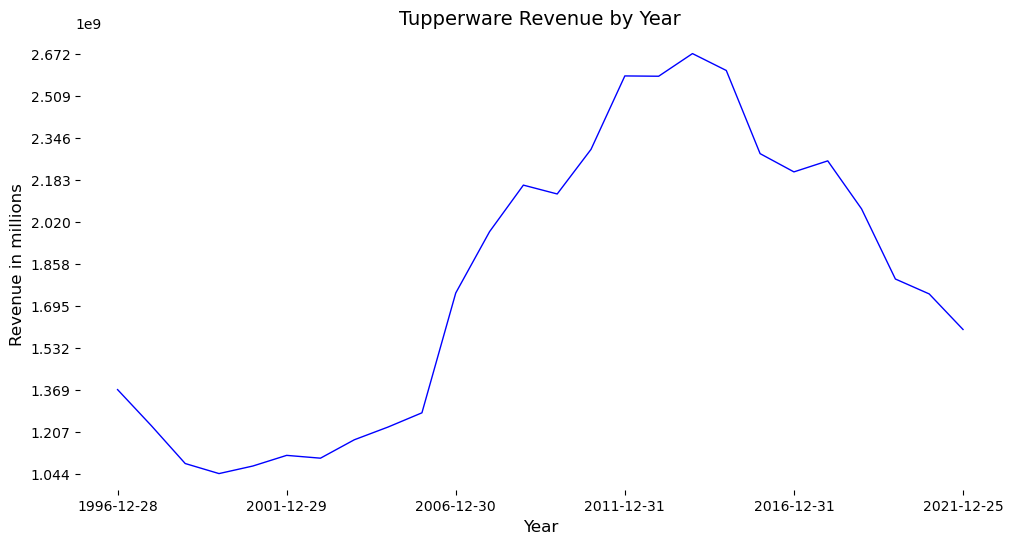

In [14]:
import matplotlib.pyplot as plt

# Transpose the dataframe so that each year is in a separate row
income_statement_graph = income_statement.loc["Revenue"].T

income_statement_graph = income_statement_graph.sort_index(ascending=True)
# Set the plot style
plt.style.use('bmh')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot
income_statement_graph.plot(kind='line', ax=ax, color='blue', linewidth=1, legend=None)

# Set the background color to white
ax.set_facecolor('white')

# Remove the borders from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the x-axis label
ax.set_xlabel('Year', fontsize=12)

# Set the y-axis label
ax.set_ylabel('Revenue in millions', fontsize=12)

min_revenue = income_statement_graph.min()
max_revenue = income_statement_graph.max()
step_size = (max_revenue - min_revenue) / 10
ax.set_yticks([min_revenue + step_size * i for i in range(11)])


# Remove the grid lines
ax.grid(False)

# Set the plot title
plt.title('Tupperware Revenue by Year', fontsize=14)

# Show the plot
plt.show()

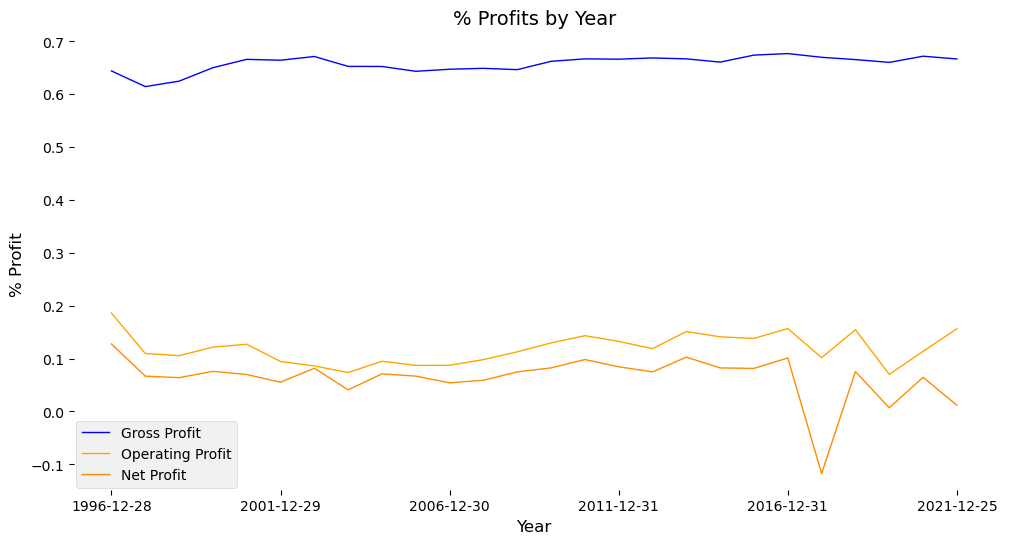

In [15]:
# Set the plot style
plt.style.use('bmh')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot for gross profit
ratio['gross profit ratio'].plot(kind='line', ax=ax, color='blue', linewidth=1, label='Gross Profit')

# Create the line plot for operating profit
ratio['operating profit ratio'].plot(kind='line', ax=ax, color='orange', linewidth=1, label='Operating Profit')

# Create the line plot for net profit
ratio['net profit ratio'].plot(kind='line', ax=ax, color='#FF8C00', linewidth=1, label='Net Profit')

# Set the background color to white
ax.set_facecolor('white')

# Remove the borders from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the x-axis label
ax.set_xlabel('Year', fontsize=12)

# Set the y-axis label
ax.set_ylabel('% Profit', fontsize=12)

# Set the plot title
plt.title('% Profits by Year', fontsize=14)

# Add the legend
plt.legend()

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()

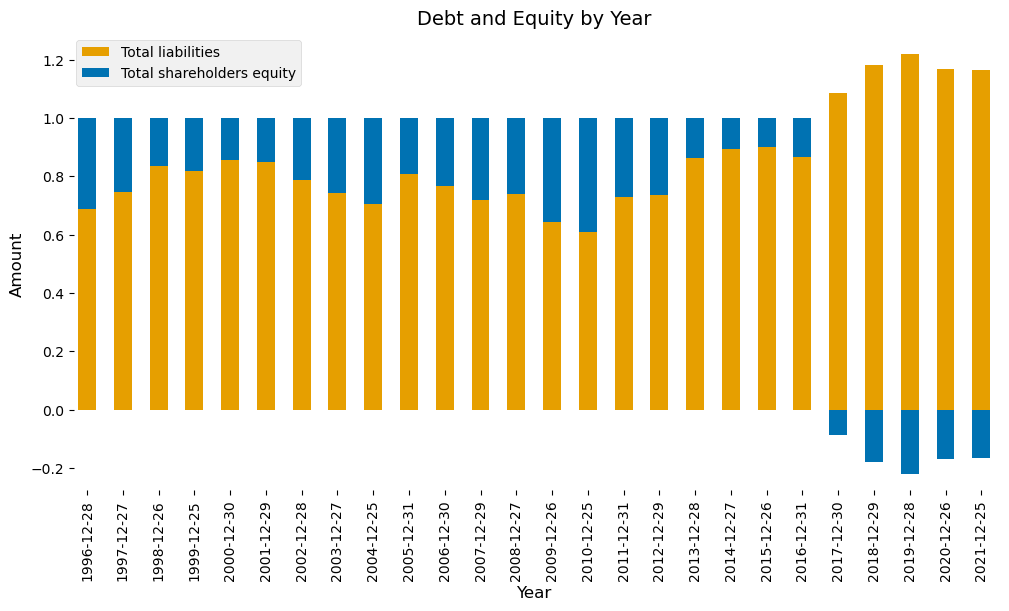

In [16]:
# Set the plot style
plt.style.use('bmh')

bs_graph = balance_sheet.loc[["Total liabilities","Total shareholders equity"]].T
bs_graph = bs_graph.sort_index(ascending=True)

# Calculate the percentage of each column
df_perc = bs_graph.divide(bs_graph.sum(axis=1), axis=0)

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Define color for debt and equity
colors = ['#E69F00','#0072B2']

# Create the stacked bar chart
df_perc.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='none')

# Set the background color to white
ax.set_facecolor('white')

# Remove the borders from the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set the x-axis label
ax.set_xlabel('Year', fontsize=12)

# Set the y-axis label
ax.set_ylabel('Amount', fontsize=12)

# Set the plot title
plt.title('Debt and Equity by Year', fontsize=14)

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()